<a href="https://colab.research.google.com/github/cyss93/CP1_team8/blob/%EB%B0%95%EC%A3%BC%EC%98%81/retention1_220630.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import time
import matplotlib.pyplot as plt

In [3]:
seller_data = pd.read_csv('/content/drive/MyDrive/olist/EDA_seller_data2.csv')
older_data = pd.read_csv('/content/drive/MyDrive/olist/EDA_order_data.csv')

In [4]:
older_data['order_approved_at'] = pd.to_datetime(older_data['order_approved_at'])

In [5]:
Today = older_data['order_approved_at'].max()

In [6]:
seller_data['first_contact_date'] = pd.to_datetime(seller_data['first_contact_date'])
seller_data['won_date'] = pd.to_datetime(seller_data['won_date'])

In [7]:
seller_data['registration_days']= (Today - seller_data['won_date']).dt.days

In [8]:
seller_data

,seller_id,origin,landing_page_id,first_contact_date,won_date,date_for_registration,business_type,lead_type,business_segment,seller_state,mean_distance,sale_days,total_profit,LTV,seller_status,registration_days
0,2c43fb513632d29b3b58df74816f1b06,organic_search,b48ec5f3b04e9068441002a19df93c6c,2018-02-21,2018-02-26 19:58:54,5,reseller,online_medium,pet,MG,388.692364,147,785.83,5.345782,maintain,183
1,7d13fca15225358621be4086e1eb0964,unknown,b76ef37428e6799c421989521c0e5077,2018-01-22,2018-02-08 17:20:14,17,reseller,online_big,watches,SP,621.754948,197,104805.89,532.009594,maintain,201
2,8a432f4e5b471f8da497d7dc517666e2,organic_search,ce1a65abd0973638f1c887a6efcfa82d,2018-02-27,2018-03-12 17:30:06,13,reseller,online_big,bed_bath_table,SP,666.394410,168,5589.89,33.273155,maintain,169
3,4c1c7281388a33dd06daac44f9fadbd1,social,88740e65d5d6b056e0cda098e1ea6313,2018-03-05,2018-03-08 18:57:56,3,reseller,online_medium,stationery,SP,491.260670,104,106.73,1.026250,leave,173
4,1d953075c2f0dd990bacf27b83b330f1,organic_search,a7982125ff7aa3b2054c6e44f9d28522,2018-05-31,2018-06-20 12:24:10,20,reseller,online_medium,computers,MG,1334.585471,53,39.68,0.748679,maintain,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,88cd3681e0a2ba85e190f7d817629c4c,paid_search,b48ec5f3b04e9068441002a19df93c6c,2017-11-14,2018-07-09 18:00:57,237,reseller,online_big,car_accessories,SC,570.534070,37,160.64,4.341622,maintain,50
375,e116c7455dd26a4d8c3e92532583905f,unknown,b76ef37428e6799c421989521c0e5077,2018-01-12,2018-01-22 02:00:00,10,reseller,online_big,health_beauty,SP,6.359304,73,21.98,0.301096,leave,219
376,8fb67a334bacec338885b4e9e1708073,paid_search,40dec9f3d5259a3d2dbcdab2114fae47,2018-04-24,2018-04-27 12:18:34,3,manufacturer,online_medium,home_decor,PR,730.266597,79,21.38,0.270633,maintain,124
377,0cab2da43793a6f3c5ed8514c5f54627,NaN,6b6c0934205e87702519d1cce24055f9,2018-03-12,2018-04-05 16:29:23,24,reseller,offline,bags_backpacks,PR,540.532197,113,252.50,2.234513,maintain,145


In [9]:
seller_data['registration_days'].max()

260

In [10]:
def retention(df,interval):
  date = list(range(interval,df['registration_days'].max(),interval))
  ret = [(len(df[(seller_data['registration_days']>=x)& (df['sale_days']>= x-interval)]) / len(df[df['registration_days']>=x]))
          if ((len(df[df['registration_days']>=x]) > 0) & (len(df[(df['registration_days']>=x)& (df['sale_days']>= x-interval)]) > 0)) else None for x in date]
  return date, ret

In [11]:
seller_data['origin'].value_counts()

organic_search    113
paid_search       101
unknown            81
direct_traffic     31
social             30
referral            9
email               6
other               2
display             2
Name: origin, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


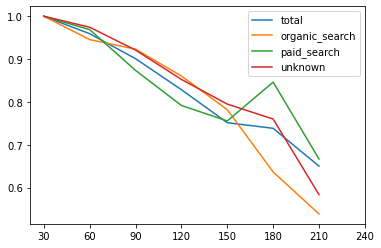

In [12]:
# 유입 경로에 따른 retention

df_organic_search = seller_data[seller_data['origin']=='organic_search']
df_paid_search = seller_data[seller_data['origin']=='paid_search']
df_unknown = seller_data[seller_data['origin']=='unknown']

interval = 30

plt.plot(retention(seller_data,interval)[0],retention(seller_data,interval)[1])
plt.plot(retention(df_organic_search,interval)[0],retention(df_organic_search,interval)[1])
plt.plot(retention(df_paid_search,interval)[0],retention(df_paid_search,interval)[1])
plt.plot(retention(df_unknown,interval)[0],retention(df_unknown,interval)[1])

plt.legend(['total', 'organic_search', 'paid_search', 'unknown'])

ax = plt.subplot()
ax.set_xticks(retention(seller_data,interval)[0])

In [13]:
seller_data['business_type'].value_counts()

reseller        287
manufacturer     89
Name: business_type, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


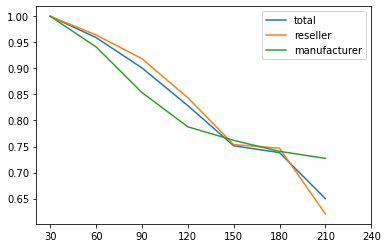

In [14]:
df_reseller = seller_data[seller_data['business_type']=='reseller']
df_manufacturer = seller_data[seller_data['business_type']=='manufacturer']

interval = 30

plt.plot(retention(seller_data,interval)[0],retention(seller_data,interval)[1])
plt.plot(retention(df_reseller,interval)[0],retention(df_reseller,interval)[1])
plt.plot(retention(df_manufacturer,interval)[0],retention(df_manufacturer,interval)[1])

plt.legend(['total', 'reseller', 'manufacturer',])

ax = plt.subplot()
ax.set_xticks(retention(seller_data,interval)[0])